### 농구선수의 게임 데이터를 활용한 포지션 예측

#### 1) 데이터 획득

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('d:/First_AI/data/csv/basketball_stat.csv')

In [3]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


##### 포지션 개수 확인 (Summary columns)

In [4]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

#### 2) 데이터 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### #그래프 출력 정의

In [6]:
def pltView(title, n = 0):
    plt.xticks(color = 'w', fontsize = 12)
    plt.yticks(color = 'w', fontsize = 12)
    plt.legend(loc= n)
    plt.title(title, color = 'w', fontsize = 15)

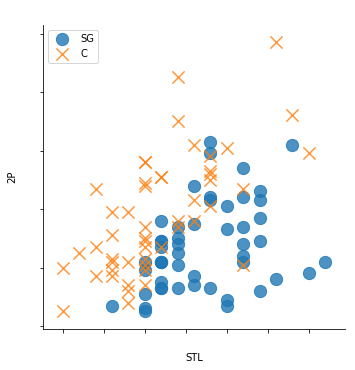

In [7]:
sns.lmplot('STL', '2P', data = df, 
           fit_reg = False, legend = False, 
           scatter_kws = {'s': 150}, 
           markers = ['o', 'x'], 
           hue ='Pos')
pltView('STL and 2P in 2d plane', 2)

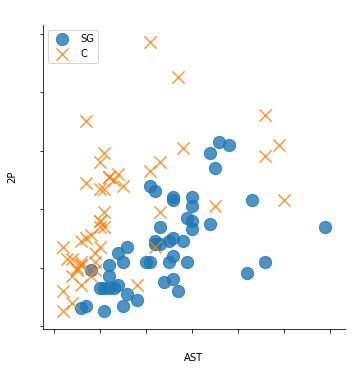

In [8]:
sns.lmplot('AST', '2P', data = df, fit_reg = False,
           legend = False,
           scatter_kws = {"s": 150},
           markers = ["o", "x"],
           hue = "Pos")

# title
pltView('AST and 2P in 2d plane',2)

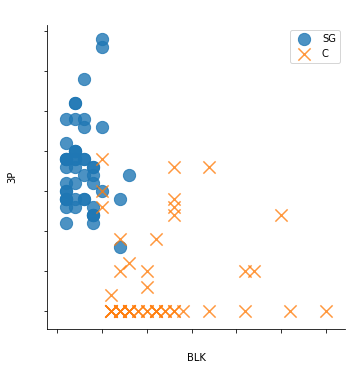

In [9]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data = df, fit_reg = False,
           legend = False,
           scatter_kws = {"s": 150},
           markers = ["o", "x"],
           hue = "Pos") 

# title
pltView('BLK and 3P in 2d plane',1)

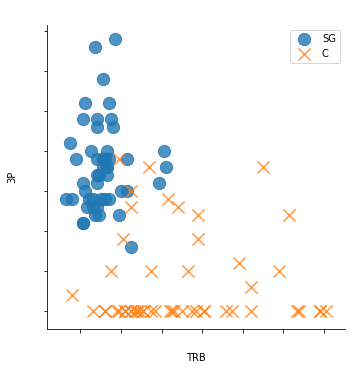

In [10]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data = df, fit_reg = False,
           legend = False,
           scatter_kws = {"s": 150},
           markers = ["o", "x"],
           hue = "Pos") # 예측값

# title
pltView('TRB and 3P in 2d plane',1)

In [11]:
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)

In [12]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


#### 3) 데이터 나누기

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train, test = train_test_split(df, test_size = 0.2)

In [15]:
train.shape[0]
train.head()

,Player,Pos,3P,TRB,BLK
85,Marreese Speights,C,1.3,4.5,0.5
26,Wayne Ellington,SG,2.4,2.1,0.1
47,Justin Holiday,SG,1.2,2.7,0.4
55,Sean Kilpatrick,SG,1.5,4.0,0.1
56,Kyle Korver,SG,2.4,2.8,0.3


In [16]:
test.shape[0]
test.head()

,Player,Pos,3P,TRB,BLK
23,Anthony Davis,C,0.5,11.8,2.2
66,JaVale McGee,C,0.0,3.2,0.9
32,Manu Ginobili,SG,1.3,2.3,0.2
67,Ben McLemore,SG,1.1,2.1,0.1
41,Gary Harris,SG,1.9,3.1,0.1


#### 4) 최적의 kNN 파라미터 찾기

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [18]:
max_k_range = train.shape[0] // 2

In [19]:
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_score = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                            cv = 10, scoring = 'accuracy')
    cross_validation_score.append(scores.mean())
cross_validation_score

[0.908531746031746,
 0.8978174603174602,
 0.8978174603174602,
 0.8978174603174602,
 0.8853174603174603,
 0.8853174603174603,
 0.8964285714285714,
 0.8964285714285714,
 0.8964285714285714,
 0.8964285714285714,
 0.9107142857142858,
 0.8964285714285716,
 0.9107142857142858,
 0.8964285714285716,
 0.883531746031746,
 0.8585317460317461,
 0.8474206349206348,
 0.8474206349206348,
 0.8349206349206348]

#### 5) k에 따른 정확도 시각화 및 k 선정

No handles with labels found to put in legend.


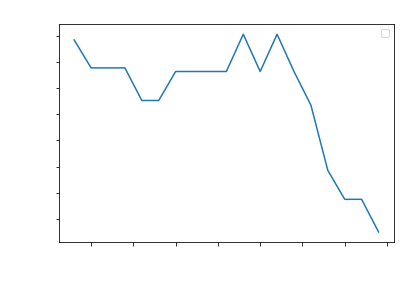

In [20]:
plt.plot(k_list, cross_validation_score)
plt.xlabel('the number of k', color = 'w', fontsize = 14)
plt.ylabel('Accuracy', color = 'w', fontsize = 14)
pltView('View')

In [21]:
k = k_list[cross_validation_score.index(max(cross_validation_score))]
print('The best number of k : ' + str(k))

The best number of k : 23


#### 6) 모델 테스트

In [25]:
knn = KNeighborsClassifier(n_neighbors = k)
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [26]:
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [32]:
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

In [33]:
pred = knn.predict(x_test)

In [35]:
comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,SG,SG
4,SG,SG
5,SG,SG
6,C,C
7,SG,C
8,SG,SG
9,C,C


In [38]:
from sklearn.metrics import accuracy_score
print("accuracy : "+ 
          str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95
